In [1]:
# Dependencies
import pandas as pd
import os
import csv
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Name of the CSV file
data = 'final_data.csv'

In [3]:
data_df = pd.read_csv(data)

In [4]:
data_df.head()

,MonthYear,Year,Sales,Price Per Gallon,Unemployment_Rate,Steel_Price_Index,New_Auto_Price_Index,Used_Auto_Price_Index
0,Jan-2005,2005,1052224.0,1.831,5.3,181.2,138.5,138.6
1,Feb-2005,2005,1244753.0,1.910,5.4,179.8,138.6,138.4
2,Mar-2005,2005,1564938.0,2.079,5.2,176.4,138.3,138.3
3,Apr-2005,2005,1493837.0,2.243,5.2,176.9,138.3,138.4
4,May-2005,2005,1488171.0,2.161,5.1,170.7,138.7,138.8


In [5]:
data_df.describe()

,Year,Sales,Price Per Gallon,Unemployment_Rate,Steel_Price_Index,New_Auto_Price_Index,Used_Auto_Price_Index
count,198.000000,1.980000e+02,198.000000,198.000000,198.000000,198.000000,198.000000
mean,2012.757576,1.281608e+06,2.780667,6.226263,216.883838,142.728773,142.548611
std,4.779591,2.465078e+05,0.564286,2.138199,31.076188,5.039555,8.583734
min,2005.000000,5.631220e+05,1.687000,3.500000,160.000000,132.069000,121.887000
25%,2009.000000,1.139623e+06,2.305250,4.600000,195.075000,137.720500,138.002250
50%,2013.000000,1.317078e+06,2.716500,5.400000,213.800000,145.378500,140.773500
75%,2017.000000,1.472140e+06,3.235000,7.875000,233.650000,146.859000,148.869500
max,2021.000000,2.115420e+06,4.062000,14.800000,352.500000,154.680000,197.227000


In [6]:
five_years_df=data_df[data_df["Year"]>2016]
five_years_df.head()

,MonthYear,Year,Sales,Price Per Gallon,Unemployment_Rate,Steel_Price_Index,New_Auto_Price_Index,Used_Auto_Price_Index
144,Jan-2017,2017,1140841.0,2.349,4.7,204.8,148.092,139.306
145,Feb-2017,2017,1331716.0,2.304,4.6,207.3,148.083,137.935
146,Mar-2017,2017,1553142.0,2.325,4.4,213.3,147.766,136.951
147,Apr-2017,2017,1424793.0,2.417,4.5,212.0,147.807,138.750
148,May-2017,2017,1517197.0,2.391,4.4,213.7,147.571,140.076


In [7]:
five_years_df.describe()

,Year,Sales,Price Per Gallon,Unemployment_Rate,Steel_Price_Index,New_Auto_Price_Index,Used_Auto_Price_Index
count,54.000000,5.400000e+01,54.000000,54.000000,54.000000,54.000000,54.000000
mean,2018.777778,1.380993e+06,2.508093,5.124074,229.085185,147.294815,143.031796
std,1.327029,1.881569e+05,0.279932,2.419101,31.803924,1.529555,11.012949
min,2017.000000,5.631220e+05,1.841000,3.500000,200.400000,145.431000,135.795000
25%,2018.000000,1.300350e+06,2.313000,3.800000,209.475000,146.383250,137.860000
50%,2019.000000,1.398961e+06,2.532000,4.100000,216.400000,146.851000,138.908500
75%,2020.000000,1.502012e+06,2.734000,5.875000,240.050000,147.900000,140.740000
max,2021.000000,1.657716e+06,3.064000,14.800000,352.500000,154.680000,197.227000


In [8]:
annual_group=five_years_df.groupby("Year")

sales_mean=round(annual_group["Sales"].mean())
sales_median=annual_group["Sales"].median()
sales_var=annual_group["Sales"].var()
sales_std=round(annual_group["Sales"].std())
sales_sem=round(annual_group["Sales"].sem())

annual_sales_df=pd.DataFrame({"Sales Mean": sales_mean,
                             "Sales Median": sales_median,
                             "Sales Variance": sales_var,
                             "Sales Standard Deviation": sales_std,
                             "Sales SEM": sales_sem})
annual_sales_df

,Sales Mean,Sales Median,Sales Variance,Sales Standard Deviation,Sales SEM
Year,,,,,
2017,1434380.0,1448644.0,1.508630e+10,122826.0,35457.0
2018,1443654.0,1420003.5,2.011606e+10,141831.0,40943.0
2019,1418658.0,1431295.5,1.922567e+10,138657.0,40027.0
2020,1224820.0,1256597.5,7.053590e+10,265586.0,76668.0
2021,1385914.0,1423111.5,2.211766e+10,148720.0,60715.0


In [9]:
gas_mean=annual_group["Price Per Gallon"].mean()
gas_median=annual_group["Price Per Gallon"].median()
gas_var=annual_group["Price Per Gallon"].var()
gas_std=annual_group["Price Per Gallon"].std()
gas_sem=annual_group["Price Per Gallon"].sem()

annual_gas_df=pd.DataFrame({"Gas Mean": gas_mean,
                             "Gas Median": gas_median,
                             "Gas Variance": gas_var,
                             "Gas Standard Deviation": gas_std,
                             "Gas SEM": gas_sem})
annual_gas_df

,Gas Mean,Gas Median,Gas Variance,Gas Standard Deviation,Gas SEM
Year,,,,,
2017,2.417000,2.3855,0.011948,0.109307,0.031554
2018,2.723000,2.7965,0.028965,0.170191,0.049130
2019,2.598250,2.6095,0.032564,0.180456,0.052093
2020,2.168833,2.1825,0.039275,0.198180,0.057210
2021,2.758667,2.8340,0.080738,0.284145,0.116002


In [10]:
unemploy_mean=annual_group["Unemployment_Rate"].mean()
unemploy_median=annual_group["Unemployment_Rate"].median()
unemploy_var=annual_group["Unemployment_Rate"].var()
unemploy_std=annual_group["Unemployment_Rate"].std()
unemploy_sem=annual_group["Unemployment_Rate"].sem()

annual_unemploy_df=pd.DataFrame({"Unemployment_Rate Mean": unemploy_mean,
                             "Unemployment_Rate Median": unemploy_median,
                             "Unemployment_Rate Variance": unemploy_var,
                             "Unemployment_Rate Standard Deviation": unemploy_std,
                             "Unemployment_Rate SEM": unemploy_sem})
annual_unemploy_df

,Unemployment_Rate Mean,Unemployment_Rate Median,Unemployment_Rate Variance,Unemployment_Rate Standard Deviation,Unemployment_Rate SEM
Year,,,,,
2017,4.350000,4.35,0.035455,0.188294,0.054356
2018,3.891667,3.85,0.015379,0.124011,0.035799
2019,3.683333,3.65,0.017879,0.133712,0.038599
2020,8.108333,7.35,13.353561,3.654252,1.054892
2021,6.050000,6.05,0.035000,0.187083,0.076376


In [11]:
steel_price_mean=annual_group["Steel_Price_Index"].mean()
steel_price_median=annual_group["Steel_Price_Index"].median()
steel_price_var=annual_group["Steel_Price_Index"].var()
steel_price_std=annual_group["Steel_Price_Index"].std()
steel_price_sem=annual_group["Steel_Price_Index"].sem()

annual_steel_price_df=pd.DataFrame({"Steel Price Index Mean": steel_price_mean,
                             "Steel Price Index Median": steel_price_median,
                             "Steel Price Index Variance": steel_price_var,
                             "Steel Price Index Standard Deviation": steel_price_std,
                             "Steel Price Index SEM": steel_price_sem})
annual_steel_price_df

,Steel Price Index Mean,Steel Price Index Median,Steel Price Index Variance,Steel Price Index Standard Deviation,Steel Price Index SEM
Year,,,,,
2017,211.991667,213.10,11.520833,3.394235,0.979831
2018,237.766667,243.30,101.780606,10.088637,2.912339
2019,222.233333,220.15,171.731515,13.104637,3.782983
2020,208.266667,206.30,65.144242,8.071198,2.329954
2021,301.250000,306.20,1667.091000,40.830026,16.668788


In [12]:
new_auto_mean=annual_group["New_Auto_Price_Index"].mean()
new_auto_median=annual_group["New_Auto_Price_Index"].median()
new_auto_var=annual_group["New_Auto_Price_Index"].var()
new_auto_std=annual_group["New_Auto_Price_Index"].std()
new_auto_sem=annual_group["New_Auto_Price_Index"].sem()

annual_new_auto_df=pd.DataFrame({"New Auto Price Index Mean": new_auto_mean,
                             "New Auto Price Index Median": new_auto_median,
                             "New Auto Price Index Var": new_auto_var,
                             "New Auto Price Index Standard Deviation": new_auto_std,
                             "New Auto Price Index Index SEM": new_auto_sem})
annual_new_auto_df

,New Auto Price Index Mean,New Auto Price Index Median,New Auto Price Index Var,New Auto Price Index Standard Deviation,New Auto Price Index Index SEM
Year,,,,,
2017,146.987333,146.9720,0.735596,0.857669,0.247588
2018,146.288000,146.4250,0.165193,0.406439,0.117329
2019,146.833583,146.9255,0.129717,0.360162,0.103970
2020,147.602083,147.4400,1.174868,1.083913,0.312899
2021,150.231333,148.9390,6.202647,2.490511,1.016747


In [13]:
used_auto_mean=annual_group["Used_Auto_Price_Index"].mean()
used_auto_median=annual_group["Used_Auto_Price_Index"].median()
used_auto_var=annual_group["Used_Auto_Price_Index"].var()
used_auto_std=annual_group["Used_Auto_Price_Index"].std()
used_auto_sem=annual_group["Used_Auto_Price_Index"].sem()

annual_used_auto_df=pd.DataFrame({"Used Auto Price Index Mean": used_auto_mean,
                             "Used Auto Price Index Median": used_auto_median,
                             "Used Auto Price Index Var": used_auto_var,
                             "Used Auto Price Index Standard Deviation": used_auto_std,
                             "Used Auto Price Index Index SEM": used_auto_sem})
annual_used_auto_df

,Used Auto Price Index Mean,Used Auto Price Index Median,Used Auto Price Index Var,Used Auto Price Index Standard Deviation,Used Auto Price Index Index SEM
Year,,,,,
2017,138.255833,138.0460,1.011689,1.005827,0.290357
2018,138.390083,138.1530,0.934108,0.966492,0.279002
2019,139.762417,139.5205,1.477394,1.215481,0.350879
2020,144.283417,138.8915,70.399319,8.390430,2.422109
2021,165.902667,159.0585,359.654269,18.964553,7.742246


The lower quartile of sales is: 1300349.75
The upper quartile of sales is: 1502011.75
The interquartile range of sales is: 201662.0
The median of sales is: 1398961.0 
The mean of sales is: 1380993.148148148 
Values below 997856.75 could be outliers.
Values above 1804504.75 could be outliers.


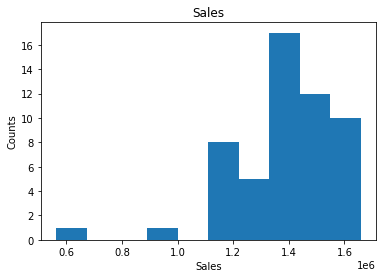

In [16]:
# Create empty list to fill 

sales = five_years_df["Sales"]

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
quartiles = sales.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
mean=five_years_df['Sales'].mean()

print(f"The lower quartile of sales is: {lowerq}")
print(f"The upper quartile of sales is: {upperq}")
print(f"The interquartile range of sales is: {iqr}")
print(f"The median of sales is: {quartiles[0.5]} ")
print(f"The mean of sales is: {mean} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")
    
plt.hist(five_years_df['Sales'])
plt.xlabel('Sales')
plt.ylabel('Counts')
plt.title('Sales')
plt.show()

In [ ]:
sales = five_years_df["Sales"].tolist()

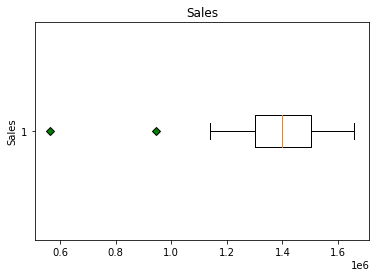

In [36]:
green_diamond = dict(markerfacecolor='g', marker='D')
fig1, ax1 = plt.subplots()
ax1.set_title('Sales')
ax1.set_ylabel('Sales')
ax1.boxplot(sales, vert=False, flierprops=green_diamond)
plt.show()
#no outliers show

In [18]:
df2017=five_years_df[five_years_df["Year"]==2017]
sales2017=df2017['Sales']
df2018=five_years_df[five_years_df["Year"]==2018]
sales2018=df2018['Sales']
df2019=five_years_df[five_years_df["Year"]==2019]
sales2019=df2019['Sales']
df2020=five_years_df[five_years_df["Year"]==2020]
sales2020=df2020['Sales']
df2021=five_years_df[five_years_df["Year"]==2021]
sales2021=df2021['Sales']

In [19]:
# Determine outliers using upper and lower bounds
quartiles1 = sales2017.quantile([.25,.5,.75])
lowerq1 = quartiles1[0.25]
upperq1 = quartiles1[0.75]
iqr1 = upperq1-lowerq1
lower_bound1 = lowerq1 - (1.5*iqr1)
upper_bound1 = upperq1 + (1.5*iqr1)
print(f"{lower_bound1} - {upper_bound1}")
sales2017_outliers=df2017[(df2017["Sales"]< lower_bound1) |
                                (df2017["Sales"]> upper_bound1)]
sales2017_outliers

1187572.75 - 1717312.75


,MonthYear,Year,Sales,Price Per Gallon,Unemployment_Rate,Steel_Price_Index,New_Auto_Price_Index,Used_Auto_Price_Index
144,Jan-2017,2017,1140841.0,2.349,4.7,204.8,148.092,139.306


In [20]:
# Determine outliers using upper and lower bounds
quartiles1 = sales2018.quantile([.25,.5,.75])
lowerq1 = quartiles1[0.25]
upperq1 = quartiles1[0.75]
iqr1 = upperq1-lowerq1
lower_bound1 = lowerq1 - (1.5*iqr1)
upper_bound1 = upperq1 + (1.5*iqr1)
print(f"{lower_bound1} - {upper_bound1}")
sales2018_outliers=df2018[(df2018["Sales"]< lower_bound1) |
                                (df2018["Sales"]> upper_bound1)]
sales2018_outliers

1093737.0 - 1834161.0


,MonthYear,Year,Sales,Price Per Gallon,Unemployment_Rate,Steel_Price_Index,New_Auto_Price_Index,Used_Auto_Price_Index


In [21]:
# Determine outliers using upper and lower bounds
quartiles1 = sales2019.quantile([.25,.5,.75])
lowerq1 = quartiles1[0.25]
upperq1 = quartiles1[0.75]
iqr1 = upperq1-lowerq1
lower_bound1 = lowerq1 - (1.5*iqr1)
upper_bound1 = upperq1 + (1.5*iqr1)
print(f"{lower_bound1} - {upper_bound1}")
sales2019_outliers=df2019[(df2019["Sales"]< lower_bound1) |
                                (df2019["Sales"]> upper_bound1)]
sales2019_outliers

1115803.25 - 1706565.25


,MonthYear,Year,Sales,Price Per Gallon,Unemployment_Rate,Steel_Price_Index,New_Auto_Price_Index,Used_Auto_Price_Index


In [23]:
# Determine outliers using upper and lower bounds
quartiles1 = sales2020.quantile([.25,.5,.75])
lowerq1 = quartiles1[0.25]
upperq1 = quartiles1[0.75]
iqr1 = upperq1-lowerq1
lower_bound1 = lowerq1 - (1.5*iqr1)
upper_bound1 = upperq1 + (1.5*iqr1)
print(f"{lower_bound1} - {upper_bound1}")
sales2020_outliers=df2020[(df2020["Sales"]< lower_bound1) |
                                (df2020["Sales"]> upper_bound1)]
sales2020_outliers

873127.875 - 1679908.875


,MonthYear,Year,Sales,Price Per Gallon,Unemployment_Rate,Steel_Price_Index,New_Auto_Price_Index,Used_Auto_Price_Index
183,Apr-2020,2020,563122.0,1.841,14.8,204.7,146.393,137.532


In [24]:
# Determine outliers using upper and lower bounds
quartiles1 = sales2021.quantile([.25,.5,.75])
lowerq1 = quartiles1[0.25]
upperq1 = quartiles1[0.75]
iqr1 = upperq1-lowerq1
lower_bound1 = lowerq1 - (1.5*iqr1)
upper_bound1 = upperq1 + (1.5*iqr1)
print(f"{lower_bound1} - {upper_bound1}")
sales2021_outliers=df2021[(df2021["Sales"]< lower_bound1) |
                                (df2021["Sales"]> upper_bound1)]
sales2021_outliers

950471.0 - 1830463.0


,MonthYear,Year,Sales,Price Per Gallon,Unemployment_Rate,Steel_Price_Index,New_Auto_Price_Index,Used_Auto_Price_Index


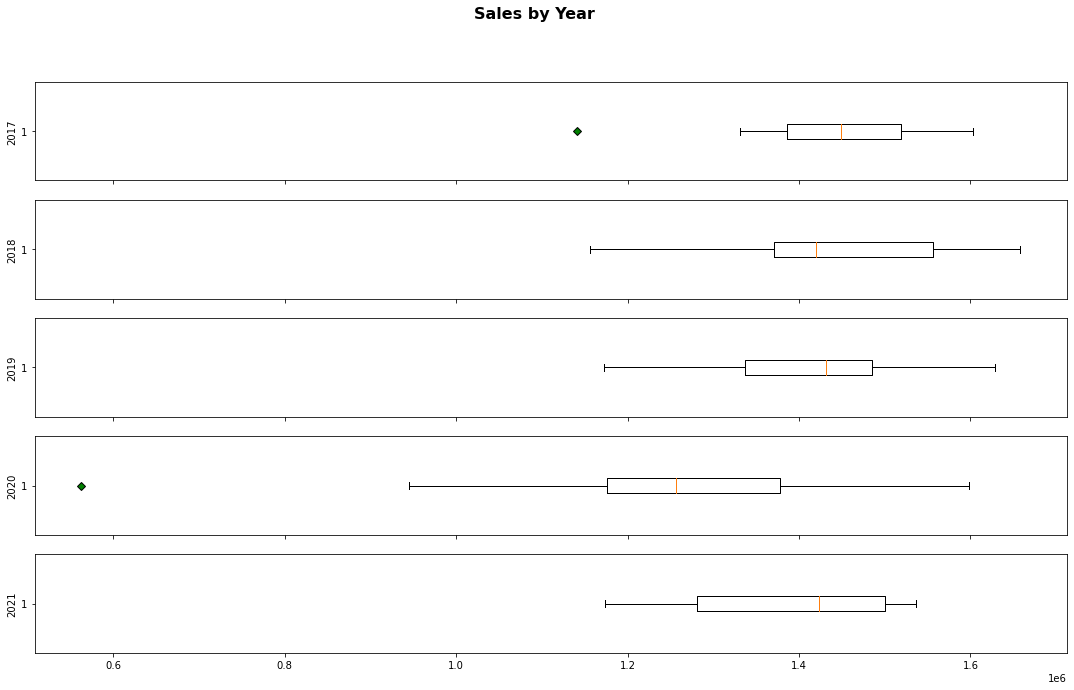

In [35]:
# Generate a box plot of all 5 years

fig1, (ax1,ax2,ax3,ax4,ax5) = plt.subplots(5,sharex=True)
fig1.set_size_inches(18.5, 10.5)
fig1.suptitle("Sales by Year",fontsize=16,fontweight="bold")


ax1.boxplot(sales2017, vert=False, flierprops=green_diamond)
ax1.set_ylabel("2017")
ax2.boxplot(sales2018, vert=False, flierprops=green_diamond)
ax2.set_ylabel("2018")
ax3.boxplot(sales2019, vert=False, flierprops=green_diamond)
ax3.set_ylabel("2019")
ax4.boxplot(sales2020, vert=False, flierprops=green_diamond)
ax4.set_ylabel("2020")
ax5.boxplot(sales2021, vert=False, flierprops=green_diamond)
ax5.set_ylabel("2021")
fig1.savefig('Images/2017-2021 Sales Box Plots.png', dpi=100)
plt.show()